# Customer Churn Analysis
Customer churn refers to the rate at which customers discontinue using a product or service. Retaining customers can lead to increased revenue, reduced acquisition costs, and improved brand loyalty.

Analyzing customer churn is crucial to identify reasons for customer loss, optimize retention strategies, and maintain business profitability by ensuring a stable and loyal customer base.

## Import Modules

In [98]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Inspect the data

### The Dataset

In [99]:
# Load the data
path = "data/ECommerceDataset.xlsx"
data = pd.read_excel(path, sheet_name="E Comm")
data_dict = pd.read_excel(path, sheet_name="Data Dict", header=1, usecols=[1,2,3])

In [100]:
# Inspect the categories
data_dict

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [101]:
# Inspect the data
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [102]:
# We don't need customerID - it gives our model no benefit
data.drop(columns=["CustomerID"], inplace=True)

In [103]:
# Let's look at info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [104]:
# Now let's look at the statistics of our data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


In [105]:
# Look at how many missing values each column has
print(f"Total values in each column: {data.shape[0]} \n")
print("Missing values per column:")
data.isnull().sum()

Total values in each column: 5630 

Missing values per column:


Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Here we can see that the percentage for the columns of null values is ~5% for each column. We can fill in each column with a suitable method.

Mean would not make sense - e.g. you do not use 0.5 coupons. Hence choose either mode or median. I will use median

In [106]:
# Fill in null values
for column in data.columns:
  if data[column].isnull().sum() > 0:
    data[column].fillna(data[column].median(), inplace=True)

# Now check to make sure we have dealt wiith nulls
data.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

### Data visualisation
Let's explore the data a bit more

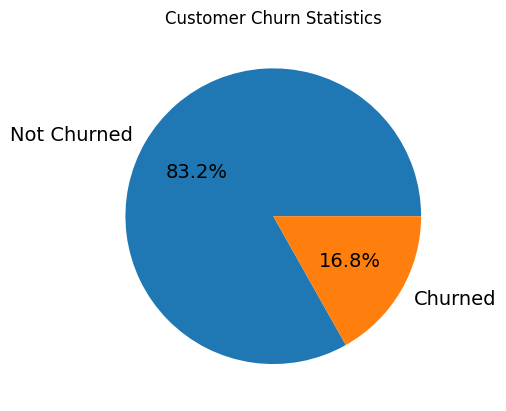

In [107]:
# Let's see how common customer churn is
counts = data["Churn"].value_counts()
labels = ["Not Churned", "Churned"]
plt.title("Customer Churn Statistics")
plt.pie(counts, labels=labels, autopct="%1.1f%%",  textprops={"fontsize":14})
plt.show()

High ratio of customer retention!

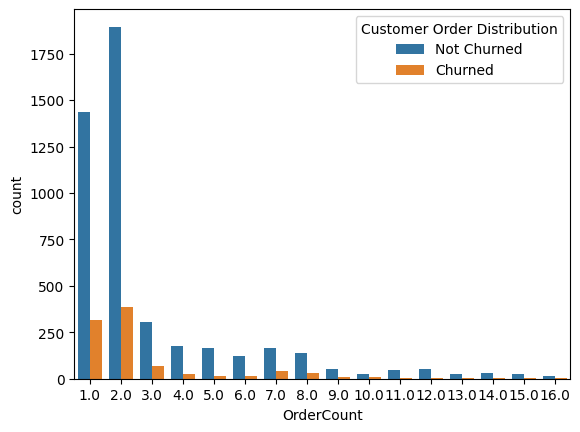

In [108]:
# Let's look at how the churn rate compares with the number of customer orders
sns.countplot(x=data["OrderCount"], hue=data["Churn"])
plt.legend(title="Customer Order Distribution",
           labels=labels
           )
plt.show()

Here we can see that the higher order count doesn't necessarily mean higher not churned value

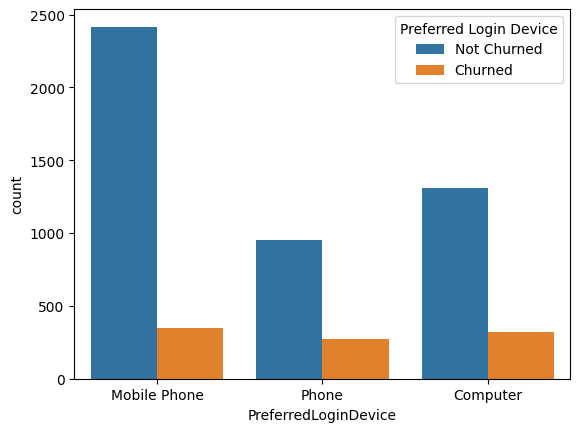

In [109]:
# Let's checkout the distribution for preferred login device
sns.countplot(x=data["PreferredLoginDevice"], hue=data["Churn"])
plt.legend(title="Preferred Login Device",
           labels=labels
           )
plt.show()

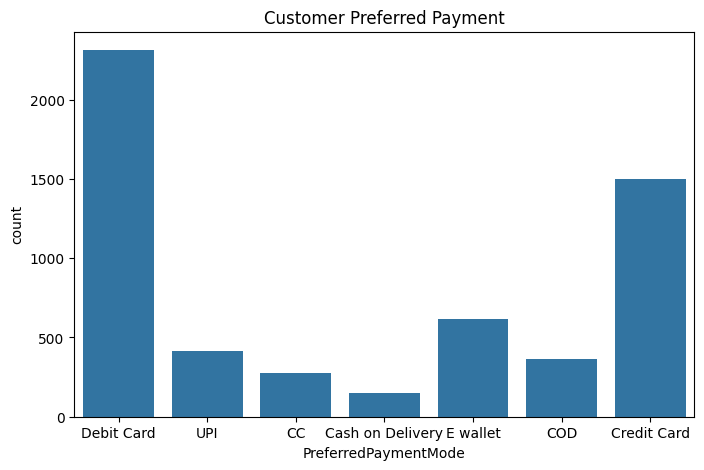

In [110]:
# Let's look at customer preferred payment
plt.figure(figsize=(8,5))
sns.countplot(x=data["PreferredPaymentMode"])
plt.title("Customer Preferred Payment")
plt.show()

Customers usually purchase using debit card

Average Satisfaction Score: 3.066785079928952


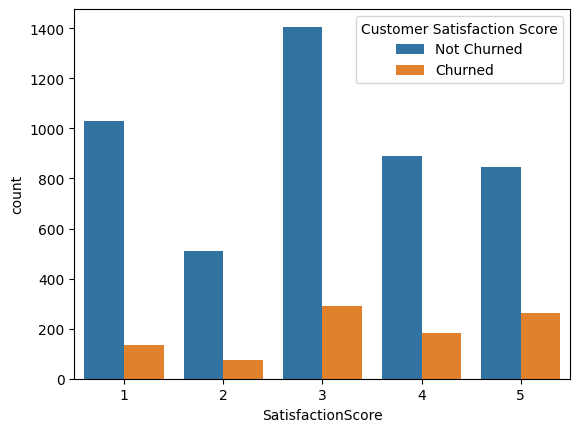

In [111]:
# Customer satisfaction score
average = data["SatisfactionScore"].mean()
print(f"Average Satisfaction Score: {average}")

sns.countplot(x=data["SatisfactionScore"], hue=data["Churn"])
plt.legend(title="Customer Satisfaction Score",
           labels=labels)
plt.show()

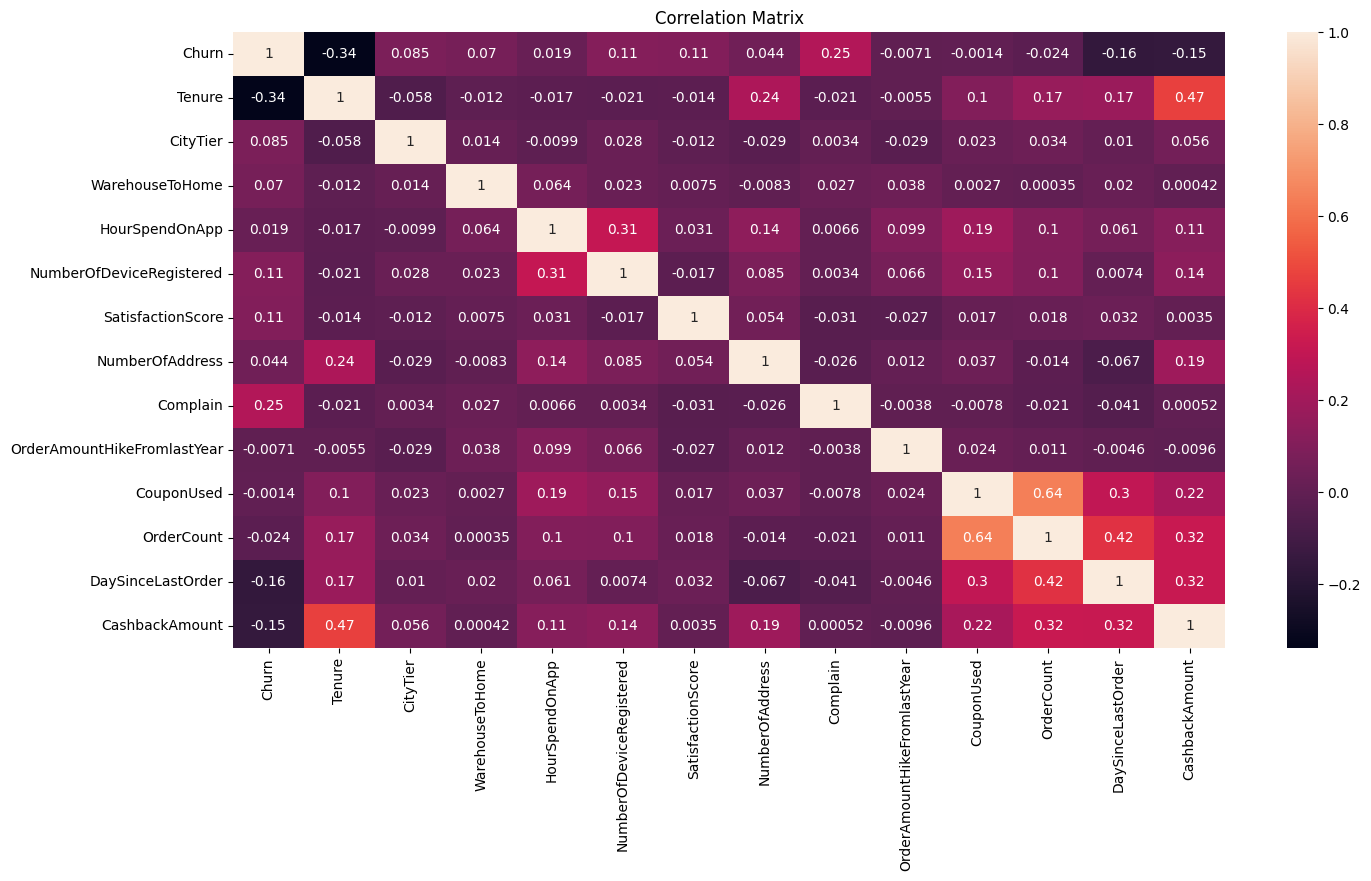

In [112]:
# Let's look at a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing

In [113]:
# We have object data types that we need to encode, let's use label encoder
def encode(x):
  if x.dtype == "object":
    x = LabelEncoder().fit_transform(x)
  return x


# Convert column dtype from object to int
data = data.apply(lambda x : encode(x))

In [114]:
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,4,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,2,1,8.0,6,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,2,1,30.0,4,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,2,3,15.0,4,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,2,1,12.0,0,1,3.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


We can see previos categorical variables are now integers between 0-(n-1), where n in amount of unique categories.

The downside to this is the introduction of statistics, such as a range, and std, into the variable.

This is still preferable to onehotencoding in this case, which would produce too many features.

In [115]:
# Balancing the dataset using oversampling
from sklearn.utils import resample
retained = data[data["Churn"] == 0]
churned = data[data["Churn"] == 1]

retained_n = len(retained)
churned_n = len(churned)

churned_oversampled = resample(churned, replace=True, n_samples=retained_n, random_state=42)
data_oversampled = pd.concat([retained, churned_oversampled])  # Concat datasets
data_oversampled = data_oversampled.sample(frac=1)  # shuffle concat dataset
data_oversampled.reset_index(drop=True, inplace=True) # reset index

# Calculate the ratio of Churn=1 to Churn=0
churn_counts = data['Churn'].value_counts()
ratio = churn_counts[1] / churn_counts[0]
print(f"Churned to Retained Ratio before oversampling: {ratio:.2f} \n")

# Calculate the ratio of Churn=1 to Churn=0
churn_counts = data_oversampled['Churn'].value_counts()
ratio = churn_counts[1] / churn_counts[0]
print(f"Churned to Retained Ratio after oversampling: {ratio:.2f}")

Churned to Retained Ratio before oversampling: 0.20 

Churned to Retained Ratio after oversampling: 1.00


Oversampling for imbalanced datasets enhances model performance by providing more examples of the minority class, reducing bias toward the majority class, improving the model's ability to recognize the minority class, and enhancing the predictive power for rare but important events, ultimately leading to more accurate and meaningful outcomes.

Oversampling may lead to overfitting, data leakage, increased training time, loss of information, and model bias. Balancing benefits with drawbacks and considering alternative techniques is crucial.

## Machine Learning Time

Let's now use some ML to predict churn amount

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Splitting Data

In [117]:
# Splitting oversampled data for model training
X = data_oversampled.drop(["Churn"], axis=1)
y = data_oversampled["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Making another testing set with original distribution

test_data = pd.concat([X_test, y_test], axis=1)

# Remove duplicate rows from the combined DataFrame
test_data_no_duplicates = test_data.drop_duplicates()

# Separate X_test and y_test again
X_test_no_duplicates = test_data_no_duplicates.drop(["Churn"], axis=1)
y_test_no_duplicates = test_data_no_duplicates["Churn"]


### Random Forest

In [118]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Oversampled Data: \n")
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(report)


Oversampled Data: 

Accuracy: 0.99

Confusion Matrix:
[[931  15]
 [  0 927]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       946
           1       0.98      1.00      0.99       927

    accuracy                           0.99      1873
   macro avg       0.99      0.99      0.99      1873
weighted avg       0.99      0.99      0.99      1873



In [119]:
# Make predictions on the test set
y_pred_no_duplicates = rf_classifier.predict(X_test_no_duplicates)

# Evaluate the model
accuracy = accuracy_score(y_test_no_duplicates, y_pred_no_duplicates)
confusion = confusion_matrix(y_test_no_duplicates, y_pred_no_duplicates)
report = classification_report(y_test_no_duplicates, y_pred_no_duplicates)

print("Original Data distribution: \n")
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(report)

Original Data distribution: 

Accuracy: 0.99

Confusion Matrix:
[[919  12]
 [  0 551]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       931
           1       0.98      1.00      0.99       551

    accuracy                           0.99      1482
   macro avg       0.99      0.99      0.99      1482
weighted avg       0.99      0.99      0.99      1482



### Logistic Regression

In [120]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
logreg_prediction = logreg.predict(X_test)
print("Oversampled Data: \n")
print('Accuracy Score: %s ' % accuracy_score(y_test, logreg_prediction))
print(classification_report(y_test, logreg_prediction))

Oversampled Data: 

Accuracy Score: 0.7880405766150561 
              precision    recall  f1-score   support

           0       0.80      0.77      0.79       946
           1       0.77      0.81      0.79       927

    accuracy                           0.79      1873
   macro avg       0.79      0.79      0.79      1873
weighted avg       0.79      0.79      0.79      1873



In [121]:
# Make predictions on the test set
y_pred_no_duplicates = logreg.predict(X_test_no_duplicates)

# Evaluate the model
accuracy = accuracy_score(y_test_no_duplicates, y_pred_no_duplicates)
confusion = confusion_matrix(y_test_no_duplicates, y_pred_no_duplicates)
report = classification_report(y_test_no_duplicates, y_pred_no_duplicates)

print("Original Data: \n")
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(report)

Original Data: 

Accuracy: 0.79

Confusion Matrix:
[[720 211]
 [105 446]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       931
           1       0.68      0.81      0.74       551

    accuracy                           0.79      1482
   macro avg       0.78      0.79      0.78      1482
weighted avg       0.80      0.79      0.79      1482



### K Nearest Neighbours

In [122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
print('Accuracy Score: %s ' % accuracy_score(y_test, knn_prediction))
print(classification_report(y_test, knn_prediction))

Accuracy Score: 0.9087026161238655 
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       946
           1       0.85      0.98      0.91       927

    accuracy                           0.91      1873
   macro avg       0.92      0.91      0.91      1873
weighted avg       0.92      0.91      0.91      1873



In [123]:
# Make predictions on the test set
y_pred_no_duplicates = knn.predict(X_test_no_duplicates)

# Evaluate the model
accuracy = accuracy_score(y_test_no_duplicates, y_pred_no_duplicates)
confusion = confusion_matrix(y_test_no_duplicates, y_pred_no_duplicates)
report = classification_report(y_test_no_duplicates, y_pred_no_duplicates)

print("Original Data: \n")
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(report)

Original Data: 

Accuracy: 0.89

Confusion Matrix:
[[779 152]
 [  7 544]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       931
           1       0.78      0.99      0.87       551

    accuracy                           0.89      1482
   macro avg       0.89      0.91      0.89      1482
weighted avg       0.91      0.89      0.89      1482



### Support Vector Machine (SVM)

In [124]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print('Accuracy Score: %s' % accuracy_score(y_test, svc_prediction))
print(classification_report(y_test, svc_prediction))


Accuracy Score: 0.7586759209823812
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       946
           1       0.73      0.82      0.77       927

    accuracy                           0.76      1873
   macro avg       0.76      0.76      0.76      1873
weighted avg       0.76      0.76      0.76      1873



In [125]:
# Make predictions on the test set
y_pred_no_duplicates = svc.predict(X_test_no_duplicates)

# Evaluate the model
accuracy = accuracy_score(y_test_no_duplicates, y_pred_no_duplicates)
confusion = confusion_matrix(y_test_no_duplicates, y_pred_no_duplicates)
report = classification_report(y_test_no_duplicates, y_pred_no_duplicates)

print("Original Data: \n")
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(report)

Original Data: 

Accuracy: 0.75

Confusion Matrix:
[[656 275]
 [ 99 452]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.70      0.78       931
           1       0.62      0.82      0.71       551

    accuracy                           0.75      1482
   macro avg       0.75      0.76      0.74      1482
weighted avg       0.78      0.75      0.75      1482



## Conclusion

We have created and tested 4 different ML models. We have not done hyperparameter tuning, so there is still room for improvement if required. The best scoring model, by a significant amount, was the random forest.


Average Run Statistics on Test Data with original Distribution:

*   Random Forest
  *   Accuracy: 0.99
  *   Precision: 0.99
  *   Recall: 0.99

*   Logistic Regression
  *   Accuracy: 0.79
  *   Precision: 0.78
  *   Recall: 0.80

*   K Nearest Neighbours
  *   Accuracy: 0.90
  *   Precision: 0.89
  *   Recall: 0.92

*   Suppert Vector Machine
  *   Accuracy: 0.74
  *   Precision: 0.74
  *   Recall: 0.76

